# Classification of low back pain and low back pain with neural compression using a Support Vector Machine model

Low back pain (LBP) is a prevalent health issue that affects a significant portion of the global population. It ranges from mild discomfort to severe pain, with some cases involving neural compression, which can lead to more debilitating symptoms. Accurate diagnosis and classification of LBP, especially distinguishing between non-specific low back pain and cases with neural compression, are crucial for effective treatment planning.

In recent years, machine learning (ML) and artificial intelligence (AI) have emerged as powerful tools in healthcare, offering new avenues for improving diagnosis and patient care. Support Vector Machines (SVM), a popular ML algorithm, is particularly well-suited for binary classification tasks, making it an excellent choice for distinguishing between two categories of LBP. By leveraging the SVC (Support Vector Classification) implementation from the scikit-learn library, this model aims to classify LBP cases in LBP or LBP with neural compression (LBPNC) based on a dataset of 168 patients. These patients provided responses to an online questionnaire that included both demographic and clinical information, offering a comprehensive view of factors potentially related to their condition.

The application of AI in this context not only aims to enhance diagnostic accuracy but also to assist healthcare professionals in identifying patients at risk of more severe complications, such as neural compression. This integration of technology into clinical practice has the potential to optimize treatment strategies, reduce the burden of LBP on individuals and healthcare systems, and improve overall patient outcomes.



In [2]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Dataset

The online questionnaire responses were loaded into an .xlsx file, which will be read and the data will be processed for use in the ML model. The questionnaire questions are the column names and are listed below:

1. How old are you?
2. What is your weight?
3. What is your height?
4. Are you currently employed or retired?
5. What is your occupation?
6. How would you describe your usual daily activities?
7. Is there a significant history of spinal problems in your family? For example, has anyone ever had spinal surgery?
8. How long has this pain approximately existed?
9. A drawing of the human body with some numbers in specific places. Which areas of your body are in pain?
10. Do you relate this pain to any triggering factor?
11. With your current level of pain, how would you classify yourself in the parameters below? Able to perform only basic activities like moving around, eating, and personal hygiene. / Limited in performing usual activities that require effort. / Limited in basic activities like moving around, personal hygiene, and eating./ Perform all my normal activities at home and work.
12. Please indicate if you notice your pain worsening (becoming more intense) during the following activities: Getting up from a seated position./ Changing position in bed./ Standing for long periods./ Sitting for long periods./ During the first activities right after getting out of bed in the morning./ Bending your body forward./ I can't relate this pain to any specific activity or position.
13. When you have pain in both your leg and your back, can you identify whether the pain is stronger in your leg, stronger in your back, or similar in both?
14. Have you noticed a fever (temperature recorded above 37.5ºC) or a lack of energy for your routine activities along with this pain?
15. Have you noticed a weight loss of more than 2 kg along with the pain?
16. Do you need assistance to walk, such as using crutches or a cane?
17. Do you have control over your urination?
18. Have you ever done physical exercises specifically for rehabilitating your spine to help relieve the pain?
19. How did you respond to this rehabilitation?
20. Are you a regular smoker?
21. Are you a regular user of illicit drugs?
22. Do you frequently experience headaches?
23. How would you describe your motivation in life?
24. Do you regularly use medication to manage your pain?
25. How frequently do you use medication to manage your pain?
26. Do you have any other medical conditions?
27. Do you have a routine of doing physical exercises (at least 3 times a week, regularly)? If so, what exercises do you do?
28. Are you able to bend forward and try to touch the floor without bending your knees?
29. Touch the inner part of your thighs and describe how it feels.
30. Touch the inner part of your knees and describe how it feels.
31. Touch the inner part of your ankles and describe how it feels.
32. Touch the top of your feet and describe how it feels.
33. Touch the outer edge of your feet and describe how it feels.
34. While lying down, lift one leg at a time, keeping it straight. Describe if: You can move it but cannot lift it./ You can lift it, but it feels heavy./ You can lift both legs without difficulty./ You cannot move it.
35. While sitting, extend one knee at a time. Describe if: You can move it but cannot lift it./ You can lift it, but it feels heavy./ You can lift both legs without difficulty./ You cannot move it.
36. While sitting, move your ankle up and down, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if: You can  lift and lower both ankles, even against the resistance of my helper./You cannot lift or lower against the resistance of your helper, but you can do it when they remove their hand./ You cannot move them.
37. While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if: You can lift both big toes, even against the resistance of your helper./ You cannot lift against the resistance of your helper, but you can do it when they remove their hand. This is on the side where you feel pain./ You cannot move them.
38. Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: Lie down with both lower limbs elevated./ Lie down and have a helper slowly raise your limb./ Lie face down and have a helper slowly bend your knee./ Lie down with both lower limbs elevated./ You do not identify any movement that increases the pain.









In [3]:
# Reading data

df_test = pd.read_excel("/content/drive/MyDrive/lombalgIA/Low back pain dataset- 168 samples.xlsx")
df_test.head()

,How old are you?,What is your weight?,What is your height?,Are you currently employed or retired?,What is your occupaion?,How would you describe your usual daily activities?,"Is there a significant history of spinal problems in your family? For example, has anyone ever had spinal surgery?","How long has this pain approximately existed? Please indicate the start of the pain, even if it was weaker or intermittent in the past.",A drawing of the human body with some numbers in specific places. Which areas of your body are in pain?,Do you relate this pain to any triggering factor?,...,Touch the inner part of your knees and describe how it feels.,Touch the inner part of your ankles and describe how it feels.,Touch the top of your feet and describe how it feels.,Touch the outer edge of your feet and describe how it feels.,"While lying down, lift one leg at a time, keeping it straight. Describe if:","While sitting, extend one knee at a time. Describe if:","While sitting, move your ankle up and down, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:","While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain:",Diagnosis
0,61,67,1.56,Employed,"Domestic service professionals: housekeepers, ...",Spends most of the time standing,No,More than 1 year.,"2, 4",Assume an uncomfortable posture,...,Similar on both sides,Similar on both sides,Similar on both sides,Similar on both sides,You can move it but cannot lift it,You can move it but cannot lift it,"You can lift and lower both ankles, even agai...","You can lift both big toes, even against the r...",Lie down and have a helper slowly raise your l...,Low back pain without neural compression
1,26,97,1.97,Employed,Professionals in the education sector: teacher...,Spends most of the time sitting,No,More than 1 year.,"1, 2, 3",I don't recall any strain or awkward movement ...,...,Similar on both sides,Similar on both sides,Similar on both sides,Similar on both sides,"You can lift it, but it feels heavy","You can lift it, but it feels heavy.","You can lift and lower both ankles, even agai...","You can lift both big toes, even against the r...","Lie down with both lower limbs elevated,Lie do...",Low back pain without neural compression
2,54,97,1.78,Retired,Professionals in the commerce sector: salespeo...,"Spends most of the time sitting,Spends most of...",No,More than 1 year.,"1, 2, 3, 4, 5","Lifting heavy objects,Emotional tension,Assume...",...,Similar on both sides,Similar on both sides,Similar on both sides,Similar on both sides,"You can lift it, but it feels heavy","You can lift it, but it feels heavy.",You cannot move it,You cannot move it,"Lie down with both lower limbs elevated,Lie do...",Low back pain without neural compression
3,27,85,1.67,Employed,"Construction professionals: bricklayers, paint...","Spends most of the time standing,Needs to lift...",No,More than 1 year.,"2, 3, 4, 5","Sudden movement,Assume an uncomfortable posture",...,Similar on both sides,Similar on both sides,Similar on both sides,Similar on both sides,"You can lift it, but it feels heavy","You can lift it, but it feels heavy.","You can lift and lower both ankles, even agai...","You can lift both big toes, even against the r...","Lie down with both lower limbs elevated,Lie do...",Low back pain with neural compression
4,43,80,1.78,Employed,"Construction professionals: bricklayers, paint...",Spends most of the time standing,Yes,More than 1 year.,"2, 3",I don't recall any strain or awkward movement ...,...,Similar on both sides,Similar on both sides,Similar on both sides,Similar on both sides,You can lift both legs without difficulty,"You can lift it, but it feels heavy.","You ca

The following two functions were created to handle numerical and textual responses, respectively. Their purpose is to map and separate the answers that were entered or selected by the patients.

In [4]:
# Preprocessing functions

def tratnum(df_trat,x):

    aux = []

    for i in range(len(df_trat.iloc[:,x])):

        lista = str(df_trat.iloc[i,x]).split(",")
        lista = list(map(float, lista))
        lista = list(map(int, lista))
        lista = list(map(str, lista))

        aux = aux + lista

    return aux



def tratstr(df_trat,x):

    aux1 = []

    for i in range(len(df_trat.iloc[:,x])):

        lista1 = str(df_trat.iloc[i,x]).split(",")
        lista1 = list(map(str, lista1))

        aux1 = aux1 + lista1

    return aux1

The following processing applies the dummy variables technique. For each question with multiple response options, new columns are created, one for each option. If the patient selected an option, that column will receive a value of 1 for that sample; if not, it will have a value of 0.

Explaining an example of dummification used in data processing, in case of question "When you have pain in both your legs and your back, can you identify whether the pain is stronger in your legs, stronger in your back, or similar in both?", there were three options: "stronger in your back than in your legs", "stronger in your legs than in your back" or "legs and back pain are similar". Consequently, a single feature (the original question) was transformed into three new features, one for each answer option. Therefore, if a patient's pain is stronger in the legs than in the back, this new feature receives the value 1 and the others receive the value 0. In cases where more than one option could be chosen, more than one of the new features, created from the original question, could receive the value 1.




In [5]:
# Data preprocessing - checkbox responses

for i in range(df_test.shape[1]):

    # Process columns where the responses are numbers

    if df_test.columns[i] == df_test.columns[8]:

        un = np.unique(tratnum(df_test,i))
        for j in un:

            for k in range(len(df_test.iloc[:,i])):

                df_test.loc[k, j] = int(j in str(df_test.iloc[k, i]))

            df_test = df_test.rename(columns={str(j) : str(df_test.columns[i]) + '--' + str(j)})


    # Process columns where the responses are strings

    if df_test.columns[i] == df_test.columns[5] or df_test.columns[i] == df_test.columns[9] or df_test.columns[i] == df_test.columns[11] or df_test.columns[i] == df_test.columns[17] or df_test.columns[i] == df_test.columns[25] or df_test.columns[i] == df_test.columns[26] or df_test.columns[i] == df_test.columns[37]:

        un = np.unique(tratstr(df_test,i))
        for j in un:

            for k in range(len(df_test.iloc[:,i])):

                df_test.loc[k, j] = int(j in str(df_test.iloc[k, i]))

            df_test = df_test.rename(columns={str(j) : str(df_test.columns[i]) + '--' + str(j)})

    # Process columns with multiple choice responses

    if df_test.columns[i] == df_test.columns[4] or df_test.columns[i] == df_test.columns[7] or df_test.columns[i] == df_test.columns[10] or df_test.columns[i] == df_test.columns[12] or df_test.columns[i] == df_test.columns[18] or df_test.columns[i] == df_test.columns[22] or df_test.columns[i] == df_test.columns[24] or df_test.columns[i] == df_test.columns[27] or df_test.columns[i] == df_test.columns[28] or df_test.columns[i] == df_test.columns[29] or df_test.columns[i] == df_test.columns[30] or df_test.columns[i] == df_test.columns[31] or df_test.columns[i] == df_test.columns[32] or df_test.columns[i] == df_test.columns[33] or df_test.columns[i] == df_test.columns[34] or df_test.columns[i] == df_test.columns[35] or df_test.columns[i] == df_test.columns[36]:

        un = np.unique(df_test.iloc[:,i])
        for j in un:

            for k in range(len(df_test.iloc[:,i])):

                df_test.loc[k, j] = int(j in str(df_test.iloc[k, i]))

            df_test = df_test.rename(columns={str(j) : str(df_test.columns[i]) + '--' + str(j)})

    else:

        df_test.iloc[:,i] = df_test.iloc[:,i]


df_test.head()

,How old are you?,What is your weight?,What is your height?,Are you currently employed or retired?,What is your occupaion?,How would you describe your usual daily activities?,"Is there a significant history of spinal problems in your family? For example, has anyone ever had spinal surgery?","How long has this pain approximately existed? Please indicate the start of the pain, even if it was weaker or intermittent in the past.",A drawing of the human body with some numbers in specific places. Which areas of your body are in pain?,Do you relate this pain to any triggering factor?,...,"While sitting, move your ankle up and down, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You can lift and lower both ankles, even against the resistance of my helper","While sitting, move your ankle up and down, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot lift or lower against the resistance of your helper, but you can do it when they remove their hand","While sitting, move your ankle up and down, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot move it","While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You can lift both big toes, even against the resistance of your helper","While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot lift against the resistance of your helper, but you can do it when they remove their hand. This is on the side where you feel pain","While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot move it","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --Lie down and have a helper slowly raise your limb","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --Lie down with both lower limbs elevated","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --Lie face down and have a helper slowly bend your knee","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --You do not identify any movement that increases the pain"
0,61,67,1.56,Employed,"Domestic service professionals: housekeepers, ...",Spends most of the time standing,No,More than 1 year.,"2, 4",Assume an uncomfortable posture,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,26,97,1.97,Employed,Professionals in the education sector: teacher...,Spends most of the time sitting,No,More than 1 year.,"1, 2, 3",I don't recall any strain or awkward movement ...,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,54,97,1.78,Retired,Professionals in the commerce sector: salespeo...,"Spends most of the time sitting,Spends most of...",No,More than 1 year.,"1, 2, 3, 4, 5","Lifting heavy objects,Emotional tension,Assume...",...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,27,85,1.67,Employed,"Construction professionals: bricklayers, paint...","Spends most of the time standing,Needs to lift...",No,More than 1 year.,"2, 3, 4, 5","Sudden movement,Assume an uncomfortable posture",...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,43,80,1.78,Employed,"Construction professionals: bricklayers, paint...",Spends most of the time standing,Yes,More than 1 year.,"2, 3",I don't recall any strain or awk

In [6]:
# Dropping original columns after processing the data

df_test = df_test.drop(columns=[df_test.columns[5],df_test.columns[8],df_test.columns[9],df_test.columns[11],df_test.columns[17],df_test.columns[25],df_test.columns[26],df_test.columns[37],df_test.columns[4],df_test.columns[7],df_test.columns[10],df_test.columns[12],df_test.columns[18],df_test.columns[22],df_test.columns[24],df_test.columns[27],df_test.columns[28],df_test.columns[29],df_test.columns[30],df_test.columns[31],df_test.columns[32],df_test.columns[33],df_test.columns[34],df_test.columns[35],df_test.columns[36]])
print(f"Number of samples: {df_test.shape[0]}. Number of columns: {df_test.shape[1]}" )

Number of samples: 168. Number of columns: 130


In [7]:
print("Columns:")

for col in df_test.columns:
    print(col)

Columns:
How old are you?
What is your weight?
What is your height?
Are you currently employed or retired?
Is there a significant history of spinal problems in your family? For example, has anyone ever had spinal surgery?
Have you noticed a fever (temperature recorded above 37.5ºC) or a lack of energy for your routine activities along with this pain?
Have you noticed a weight loss of more than 2 kg along with the pain?
Do you need assistance to walk, such as using crutches or a cane?
Do you have control over your urination?
Are you a regular smoker?
Are you a regular user of illicit drugs?
Do you frequently experience headaches? 
Do you regularly use medication to manage your pain?   
Diagnosis
What is your occupaion?--Construction professionals: bricklayers, painters, electricians, plumbers, and others.
What is your occupaion?--Domestic service professionals: housekeepers, cooks, gardeners, nannies, homemakers, and helpers, among others.
What is your occupaion?--Industry professionals

In [8]:
# Dummification in questions with two response options

# False/No/Retired/I lose urine without noticing, even if it's only small amounts. = 0
# True/Yes/Employed/Yes, as I can hold my urine even during efforts like sneezing or coughing. = 1


for i in range(df_test.shape[0]):

    for j in range(df_test.shape[1]):

        if df_test.iat[i,j] == True or df_test.iat[i,j] == "Yes" or df_test.iat[i,j] == "Employed" or df_test.iat[i,j] == "Yes, as I can hold my urine even during efforts like sneezing or coughing.":
            df_test.iat[i,j] = 1

        if df_test.iat[i,j] == False or df_test.iat[i,j] == "No" or df_test.iat[i,j] == "Retired" or df_test.iat[i,j] == "I lose urine without noticing, even if it's only small amounts.":
            df_test.iat[i,j] = 0

        else:
            df_test.iat[i,j] = df_test.iat[i,j]

df_test.head()

,How old are you?,What is your weight?,What is your height?,Are you currently employed or retired?,"Is there a significant history of spinal problems in your family? For example, has anyone ever had spinal surgery?",Have you noticed a fever (temperature recorded above 37.5ºC) or a lack of energy for your routine activities along with this pain?,Have you noticed a weight loss of more than 2 kg along with the pain?,"Do you need assistance to walk, such as using crutches or a cane?",Do you have control over your urination?,Are you a regular smoker?,...,"While sitting, move your ankle up and down, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You can lift and lower both ankles, even against the resistance of my helper","While sitting, move your ankle up and down, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot lift or lower against the resistance of your helper, but you can do it when they remove their hand","While sitting, move your ankle up and down, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot move it","While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You can lift both big toes, even against the resistance of your helper","While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot lift against the resistance of your helper, but you can do it when they remove their hand. This is on the side where you feel pain","While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot move it","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --Lie down and have a helper slowly raise your limb","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --Lie down with both lower limbs elevated","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --Lie face down and have a helper slowly bend your knee","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --You do not identify any movement that increases the pain"
0,61,67,1.56,1,0,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,26,97,1.97,1,0,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,54,97,1.78,0,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,27,85,1.67,1,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,43,80,1.78,1,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [9]:
# Reallocating the target to the last column

last_column = df_test.pop('Diagnosis')
df_test.insert(df_test.shape[1],'Diagnosis',last_column)

The following code block normalizes the age, weight, and height values provided by the patients in years, kilograms and meters, respectively, adjusting them so that the magnitude (Euclidean norm) of each sample vector was 1.

In [10]:
# Normalizing numerical variables

# Age
df_test['How old are you?'] = df_test['How old are you?'].replace([df_test['How old are you?']],[preprocessing.normalize([df_test['How old are you?']])])

# Weight
df_test['What is your weight?'] = df_test['What is your weight?'].replace([df_test['What is your weight?']],[preprocessing.normalize([df_test['What is your weight?']])])

# Height
df_test['What is your height?'] = df_test['What is your height?'].replace([df_test['What is your height?']],[preprocessing.normalize([df_test['What is your height?']])])

The following code block is also necessary because the machine learning model requires numerical input to process and make predictions. By converting the labels from strings to numerical values (0 and 1), the model can more effectively learn the patterns and relationships in the data. The numerical format also simplifies the calculation of metrics like accuracy and loss during training.

In [11]:
# Defining models's target

# 0 -> Low back pain
# 1 -> Low back pain with neural compression

for i in range(df_test.shape[0]):

    # print(i)
    if df_test['Diagnosis'][i] == 'Low back pain without neural compression':
        df_test.loc[i, 'Diagnosis'] = 0

    elif df_test['Diagnosis'][i] == 'Low back pain with neural compression':
        df_test.loc[i, 'Diagnosis'] = 1

df_test.head()

,How old are you?,What is your weight?,What is your height?,Are you currently employed or retired?,"Is there a significant history of spinal problems in your family? For example, has anyone ever had spinal surgery?",Have you noticed a fever (temperature recorded above 37.5ºC) or a lack of energy for your routine activities along with this pain?,Have you noticed a weight loss of more than 2 kg along with the pain?,"Do you need assistance to walk, such as using crutches or a cane?",Do you have control over your urination?,Are you a regular smoker?,...,"While sitting, move your ankle up and down, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot lift or lower against the resistance of your helper, but you can do it when they remove their hand","While sitting, move your ankle up and down, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot move it","While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You can lift both big toes, even against the resistance of your helper","While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot lift against the resistance of your helper, but you can do it when they remove their hand. This is on the side where you feel pain","While sitting, move your big toe upward, one at a time. It is important that someone can help by placing their hand opposite to the movement and applying some resistance. Describe if:--You cannot move it","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --Lie down and have a helper slowly raise your limb","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --Lie down with both lower limbs elevated","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --Lie face down and have a helper slowly bend your knee","Please perform the following postures and identify if, while doing them, you notice an increase in the intensity of your pain: --You do not identify any movement that increases the pain",Diagnosis
0,0.086830,0.064325,0.072782,1,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,0.037010,0.093127,0.091911,1,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0
2,0.076866,0.093127,0.083046,0,0,0,0,1,0,0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3,0.038433,0.081606,0.077914,1,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
4,0.061208,0.076806,0.083046,1,1,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1


Next, a detailed presentation is provided on how the data is distributed between the two classes of interest.

Low back pain diagnosis has 119 samples, which corresponds to 70.833% of the total.
Low back pain with neural compression diagnosis  has 49 samples, which corresponds to 29.167% of the total.


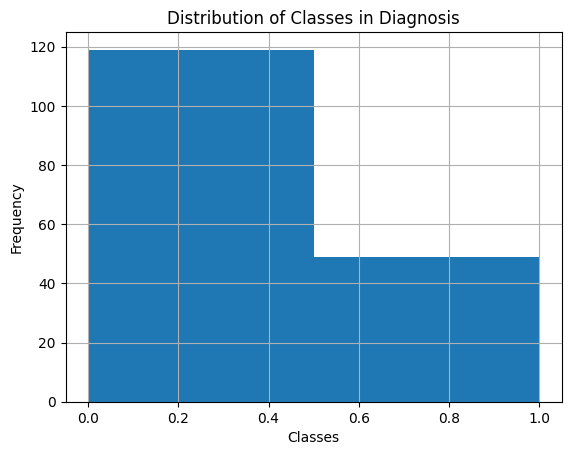

In [12]:
# Analyzing the distribution between the two classes

class_counting = df_test['Diagnosis'].value_counts()
print(f"Low back pain diagnosis has {class_counting.values[0]} samples, which corresponds to {(class_counting.values[0]/(class_counting.values[0]+class_counting.values[1]))*100:.3f}% of the total.")
print(f"Low back pain with neural compression diagnosis  has {class_counting.values[1]} samples, which corresponds to {(class_counting.values[1]/(class_counting.values[0]+class_counting.values[1]))*100:.3f}% of the total.")

ax = df_test['Diagnosis'].hist(bins=2)
plt.title('Distribution of Classes in Diagnosis')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

The dataset will be divided into X (features or inputs) and y (labels or outputs).

In [13]:
# Separating features (inputs) and lables (outputs)

X = df_test.drop(columns=['Diagnosis'])
y = [int(target) for target in df_test['Diagnosis'].values]

The MinMaxScaler() is a tool in data preprocessing used to normalize the range of features in a dataset. It scales the data to a fixed range, between 0 and 1, by subtracting the minimum value of the feature and then dividing by the range (maximum - minimum). This is particularly useful when the features have different scales and you want to ensure that they contribute equally to the model's learning process.

$$X_{scaled}​=\frac{X_{max}​−X_{min}}{​X−X_{min}}$$

In [14]:
# Normalization with MinMaxScaler()

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X.values)

## Support Vector Machine (SVM)

SVM aims to find the optimal hyperplane that best separates the data into two classes. In binary classification, this hyperplane is a line in 2D, a plane in 3D, and a hyperplane in higher dimensions. The goal is to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class. These nearest points are called support vectors.

After ensuring data is properly scaled, using MinMaxScaler, as SVM is sensitive to feature scaling, the model will be trained and tested using Stratified KFold, wich is a variation of the K-Fold cross-validation technique, commonly used in machine learning for evaluating the performance of a model. It ensures that each fold in the cross-validation process has the same proportion of class labels as the original dataset, and it is very important in this case because of mbalanced data.The dataset is randomly split into k equally-sized subsets or folds, and the model is trained on k-1 folds and tested on the remaining one fold. This process is repeated k times, each time with a different fold as the test set. The final performance metric is the average of the metrics across all k iterations. By maintaining the original class distribution in each fold, Stratified K-Fold provides a more accurate and reliable estimate of the model's performance, especially on imbalanced datasets.

The model used in this case is SVC() from scikit-learn library. It has some hyperparameters like kernel, C, ccp_alpha, gamma and class_weight that should be tuned to optimize the model's performance. Hyperparameters are parameters that are set before the training process begins and are not learned from the data.

For this, the "Grid Search" technique can be used. It systematically works through multiple combinations of hyperparameter values, evaluating each combination's performance, and selecting the one that yields the best results.Then, lists of possible hyperparameters and combinations of these values were made, together with the Stratified KFold, and the result of each combination was stored. Thus, the best combination of hyperparameters was chosen based on the highest accuracy resulting from the model testing.


In [16]:
# Grid Search using StratifiedKFold

results = []

# SVC - kernel rbf - parameters
c_list = [0.01, 0.025, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50, 100, 150]
class_weight_list = ['balanced', None]
gamma_list = [1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 100, 'auto', 'scale']
shrinking_list = [True, False]
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

kf = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train_idx, test_idx) in enumerate(kf.split(X_scaled,y)):
    X_train = X_scaled[train_idx]
    X_test = X_scaled[test_idx]

    y_train = np.array(y)[train_idx]
    y_test = np.array(y)[test_idx]

    for c in c_list:
      for class_weight in class_weight_list:
        for gamma in gamma_list:
          for shrinking in shrinking_list:
            for kernel in kernel_list:
                model = SVC(kernel=kernel, C=c, class_weight=class_weight, gamma=gamma, shrinking=shrinking, tol=0.001)

                history = model.fit(X_train, y_train)

                # make predictions
                y_predicted = model.predict(X_test)
                y_predicted_train = model.predict(X_train)

                # evaluate predictions
                test_accuracy = model.score(X_test, y_test)
                train_accuracy = model.score(X_train, y_train)

                results_dict = {
                    "fold": i,
                    "kernel": kernel,
                    "c": c,
                    "class_weight": class_weight,
                    "gamma": gamma,
                    "shrinking": shrinking,
                    "test accuracy": test_accuracy,
                    "train accuracy": train_accuracy
                }
                results.append(results_dict)
df = pd.DataFrame(results)

num = int(df.shape[0]/5)

accuracies_test = []
avgs_acc_test = []
stds_acc_test = []

accuracies_train = []
avgs_acc_train = []
stds_acc_train = []

for n in range(0,num):
  acc_teste = [df["test accuracy"][n], df["test accuracy"][n+num],df["test accuracy"][n+(2*num)], df["test accuracy"][n+(3*num)], df["test accuracy"][n+(4*num)]]
  acc_treino = [df["train accuracy"][n], df["train accuracy"][n+num],df["train accuracy"][n+(2*num)], df["train accuracy"][n+(3*num)], df["train accuracy"][n+(4*num)]]
  accuracies_test.append(acc_teste)
  avgs_acc_test.append(np.mean(accuracies_test[n]))
  stds_acc_test.append(np.std(accuracies_test[n]))

  accuracies_train.append(acc_treino)
  avgs_acc_train.append(np.mean(accuracies_train[n]))
  stds_acc_train.append(np.std(accuracies_train[n]))


mean_std = [avgs_acc_train, stds_acc_train, avgs_acc_test, stds_acc_test]
df_mean_std = pd.DataFrame(np.transpose(mean_std),columns=["Average training accuracy", "Standard deviation (training acc.)", "Average testing accuracy", "Standard deviation (testing acc.)"])

df_final = df.drop(columns=["fold", "train accuracy", "test accuracy"])
df_final = df_final.drop(range(num, num*5))
df_final = pd.concat([df_final, df_mean_std], axis=1)

df_final.sort_values("Average testing accuracy", ascending=False).head(10)

,kernel,c,class_weight,gamma,shrinking,Average training accuracy,Standard deviation (training acc.),Average testing accuracy,Standard deviation (testing acc.)
670,rbf,1.0,balanced,0.1,False,1.0,0.0,0.714617,0.046361
666,rbf,1.0,balanced,0.1,True,1.0,0.0,0.714617,0.046361
1466,rbf,6.0,balanced,0.1,True,1.0,0.0,0.708556,0.026762
2346,rbf,15.0,None,0.1,True,1.0,0.0,0.708556,0.026762
2426,rbf,20.0,balanced,0.1,True,1.0,0.0,0.708556,0.026762
1230,rbf,4.0,None,0.1,False,1.0,0.0,0.708556,0.026762
1226,rbf,4.0,None,0.1,True,1.0,0.0,0.708556,0.026762
2350,rbf,15.0,None,0.1,False,1.0,0.0,0.708556,0.026762
2986,rbf,150.0,None,0.1,True,1.0,0.0,0.708556,0.026762
2990,rbf,150.0,None,0.1,False,1.0,0.0,0.708556,0.026762


As a result of Grid Search, the best combination of hyperparameters can be seen in the first row of the DataFrame above. These hyperparameters will be applied to the following model, so that its performance can be evaluated. For the evaluation, the following metrics will be analyzed:

* **Confusion Matrix:** provides a detailed breakdown of how well the model's predictions match the actual class labels. For a binary classification problem, the confusion matrix is a 2x2 table that includes the following four key components:
     1. True Positive (TP): The number of instances where the model correctly predicted the positive class.
     2. True Negative (TN): The number of instances where the model correctly predicted the negative class.
     3. False Positive (FP): The number of instances where the model incorrectly predicted the positive class (also known as a Type I error).
     4. False Negative (FN): The number of instances where the model incorrectly predicted the negative class (also known as a Type II error).

  These components are arranged in the matrix like this:

| | Actual Positive | Actual Negative |
| ------- | ----- | ----- |
| Predicted Positive | TP     | FP    |
| Predicted Negative | FN     | TN     |


* **Accuracy:** is the ratio of the number of correct predictions to the total number of predictions made. It is a general measure of how often the model is correct.
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

* **Precision:** measures the proportion of true positive predictions among all positive predictions made by the model. It shows how many of the predicted positives are actually positive.

$$
\text{Precision} = \frac{\text{True positives}}{\text{True positives + False positives}}
$$

* **Recall:** measures the proportion of actual positives that are correctly identified by the model. It shows how many of the actual positives were predicted correctly.

$$
\text{Recall} = \frac{\text{True positives}}{\text{True positives + False negatives}}
$$

* **F1-score:** is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single metric that considers both false positives and false negatives.

$$
\text{F1 Score} = 2* \frac{Precision*Recall}{Precision+Recall}
$$

* **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):** ROC-AUC measures the model's ability to distinguish between classes. It is the area under the ROC curve, which plots the true positive rate (recall) against the false positive rate at various thresholds.

In [17]:
# Support Vector Machine optimized model with StratifiedKFold

accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []
roc_aucs = {}

kf = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train_idx, test_idx) in enumerate(kf.split(X_scaled,y)):
    X_train = X_scaled[train_idx]
    X_test = X_scaled[test_idx]

    y_train = np.array(y)[train_idx]
    y_test = np.array(y)[test_idx]

    # Optimized model
    model = SVC(kernel='rbf', C=1, class_weight='balanced', gamma=0.1, shrinking=False, probability=True)

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)
    recall = recall_score(y_test, y_pred)
    recalls.append(recall)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Confusio Matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)

    # ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_aucs = {
        'fpr': fpr,
        'tpr': tpr,
        'thresholds:': thresholds,
        'roc_auc': roc_auc
    }

print(f'Accuracy: {np.mean(accuracies):.6f} +- {np.std(accuracies):.6f}')
print(f'Precision: {np.mean(precisions):.6f} +- {np.std(precisions):.6f}')
print(f'Recall: {np.mean(recalls):.6f} +- {np.std(recalls):.6f}')
print(f'F1-Score: {np.mean(f1_scores):.6f} +- {np.std(f1_scores):.6f}')


Accuracy: 0.714439 +- 0.021350
Precision: 0.366667 +- 0.305505
Recall: 0.102222 +- 0.089553
F1-Score: 0.159441 +- 0.138058


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


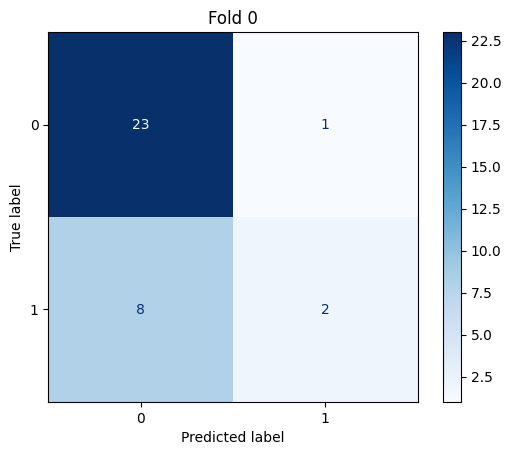

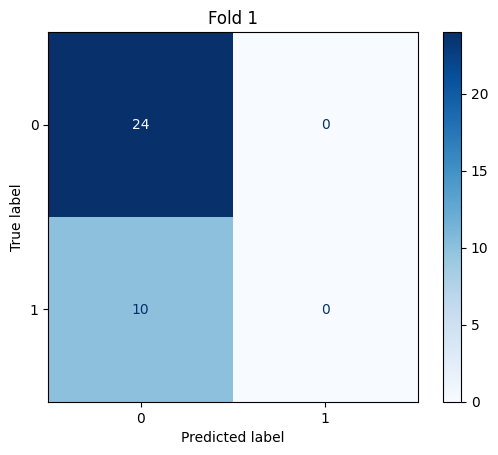

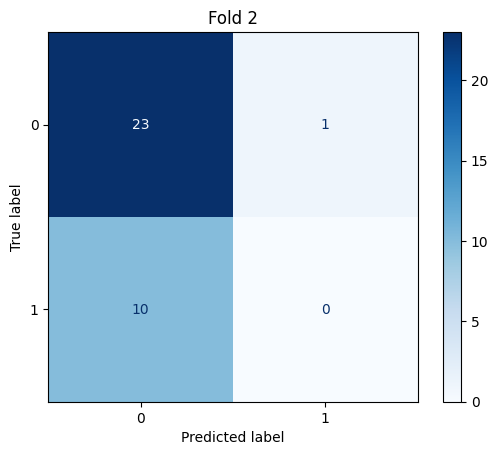

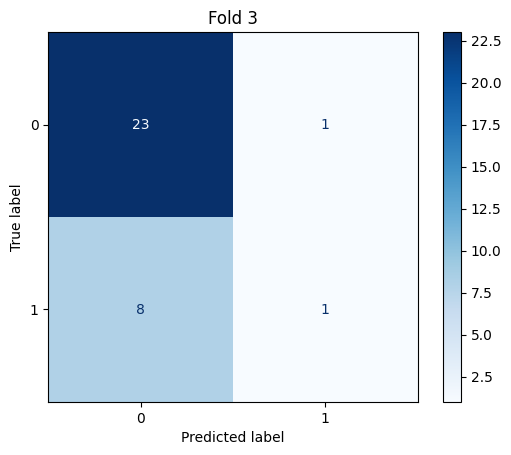

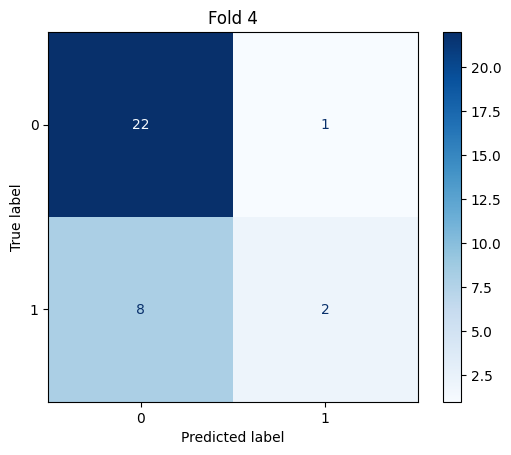

In [18]:
# Confusion matrix for each fold

for fold_idx, cm in enumerate(conf_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Fold {fold_idx}')
    plt.show()

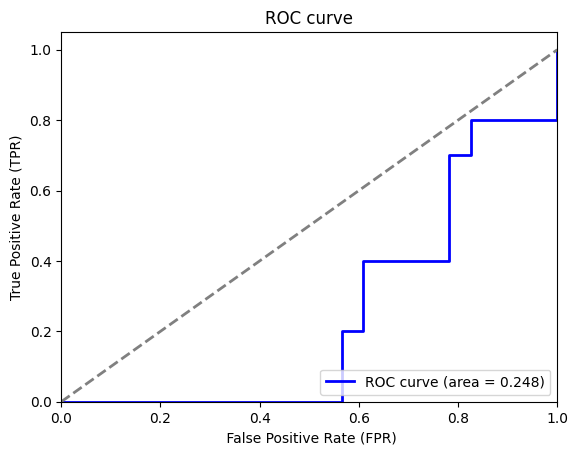

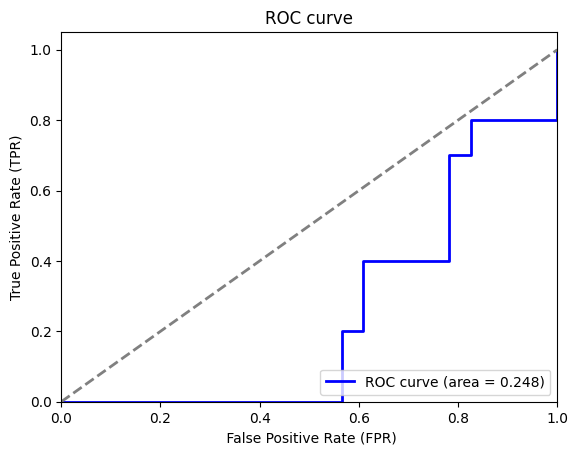

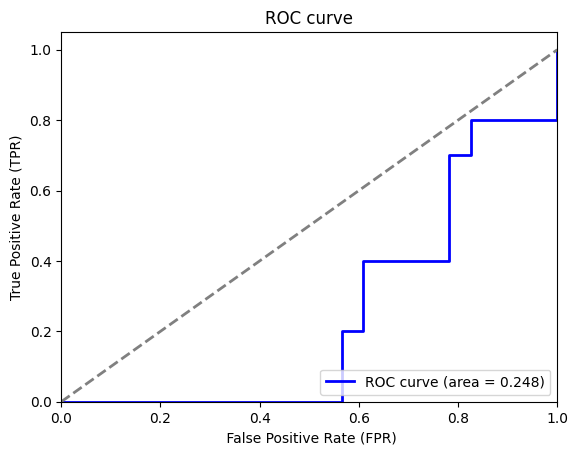

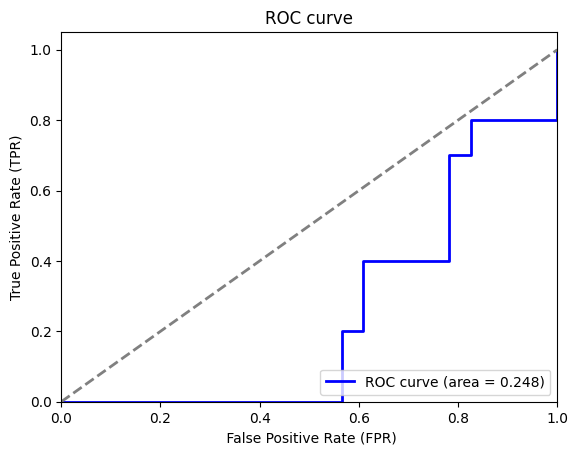

In [19]:
for i in range(len(roc_aucs)):
    fpr = roc_aucs['fpr']
    tpr = roc_aucs['tpr']
    roc_auc = roc_aucs['roc_auc']
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(' False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()